### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [37]:
import numpy as np

In [38]:
m = np.arange(12).reshape((3,4))
m,m.mean(axis=1), m.mean(axis=0), m.mean()

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([1.5, 5.5, 9.5]),
 array([4., 5., 6., 7.]),
 5.5)

2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [39]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
rl = np.outer(u, v)
u.reshape(4,1)*v, rl, [[i*j for i in u]for j in v]

(array([[ 2,  4,  6,  8],
        [ 6, 12, 18, 24],
        [10, 20, 30, 40],
        [14, 28, 42, 56]]),
 array([[ 2,  4,  6,  8],
        [ 6, 12, 18, 24],
        [10, 20, 30, 40],
        [14, 28, 42, 56]]),
 [[2, 6, 10, 14], [4, 12, 20, 28], [6, 18, 30, 42], [8, 24, 40, 56]])

3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [40]:
import numpy.random as npr
npr.seed(123) # fix seed for reproducible result

matrix = npr.rand(10,6)
print ("uniform:",'\n', matrix,'\n')
mask = (matrix < 0.1)
delRow = np.any(mask,axis=1)
matrix[delRow,:] = 0
print ("uniform:",'\n', matrix,'\n')

uniform: 
 [[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646]
 [0.9807642  0.68482974 0.4809319  0.39211752 0.34317802 0.72904971]
 [0.43857224 0.0596779  0.39804426 0.73799541 0.18249173 0.17545176]
 [0.53155137 0.53182759 0.63440096 0.84943179 0.72445532 0.61102351]
 [0.72244338 0.32295891 0.36178866 0.22826323 0.29371405 0.63097612]
 [0.09210494 0.43370117 0.43086276 0.4936851  0.42583029 0.31226122]
 [0.42635131 0.89338916 0.94416002 0.50183668 0.62395295 0.1156184 ]
 [0.31728548 0.41482621 0.86630916 0.25045537 0.48303426 0.98555979]
 [0.51948512 0.61289453 0.12062867 0.8263408  0.60306013 0.54506801]
 [0.34276383 0.30412079 0.41702221 0.68130077 0.87545684 0.51042234]] 

uniform: 
 [[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646]
 [0.9807642  0.68482974 0.4809319  0.39211752 0.34317802 0.72904971]
 [0.         0.         0.         0.         0.         0.        ]
 [0.53155137 0.53182759 0.63440096 0.84943179 0.72445532 0.61102351]
 [0.72244

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[0.76159822 0.82506474 3.87145761 3.93492413]


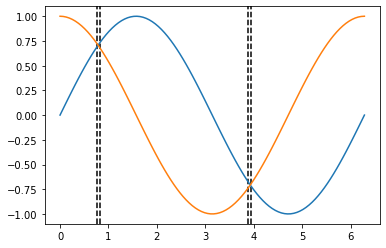

In [41]:
import matplotlib.pyplot as plt 
%matplotlib inline 

x = np.linspace(0, 2*np.pi, 100)
every10elem = x[0:100:10] 
reversedx = x[::-1]
mask = (np.abs((np.sin(x)-np.cos(x)))<0.1)
closePoints = x[mask]




print(closePoints)

y1 = np.sin(x)
y2 = np.cos(x)
for xc in closePoints:
    plt.axvline(x=xc, color='k', linestyle='--')
    
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [42]:
matrixmul = np.fromfunction(lambda i, j: (i+1)*(j+1), (10,10))
print("trace", np.trace(matrixmul))
print("Anti diagonal", np.fliplr(matrixmul).diagonal())
print("Diagonal offeset by 1 ", np.diagonal(matrixmul,1))

trace 385.0
Anti diagonal [10. 18. 24. 28. 30. 30. 28. 24. 18. 10.]
Diagonal offeset by 1  [ 2.  6. 12. 20. 30. 42. 56. 72. 90.]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [43]:
distances = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

twodgrid = np.abs(distances.reshape(distances.shape[0],1)-distances)
print(twodgrid*0.621)

[[   0.     122.958  188.163  457.056  540.891  729.675  915.975  958.824
  1187.973 1520.208]
 [ 122.958    0.      65.205  334.098  417.933  606.717  793.017  835.866
  1065.015 1397.25 ]
 [ 188.163   65.205    0.     268.893  352.728  541.512  727.812  770.661
   999.81  1332.045]
 [ 457.056  334.098  268.893    0.      83.835  272.619  458.919  501.768
   730.917 1063.152]
 [ 540.891  417.933  352.728   83.835    0.     188.784  375.084  417.933
   647.082  979.317]
 [ 729.675  606.717  541.512  272.619  188.784    0.     186.3    229.149
   458.298  790.533]
 [ 915.975  793.017  727.812  458.919  375.084  186.3      0.      42.849
   271.998  604.233]
 [ 958.824  835.866  770.661  501.768  417.933  229.149   42.849    0.
   229.149  561.384]
 [1187.973 1065.015  999.81   730.917  647.082  458.298  271.998  229.149
     0.     332.235]
 [1520.208 1397.25  1332.045 1063.152  979.317  790.533  604.233  561.384
   332.235    0.   ]]


7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [44]:
N = 99
numbers = np.arange(N+1)
def prime(N):
    mask = np.ones((N+1,), dtype=bool)
    mask[0],mask[1] = False, False
    for i in range(2,N+1):
        for j in range(2,N+1):
            multiplo = i*j
            if multiplo < N+1:
                mask[multiplo] = False
    #print("prime numbers", numbers[mask])

N = [10 , 50, 99]
%timeit prime(N[0])
%timeit prime(N[1])
%timeit prime(N[2])
print("the solution nr1 doesn't scale well with N, it looks ")
def sieve(n):
    flags = np.ones(n, dtype=bool)
    flags[0] = flags[1] = False
    for i in range(2, n):
        if flags[i]:
            flags[i*i::i] = False
    return np.flatnonzero(flags)
%timeit sieve(99)

9.27 µs ± 24.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
176 µs ± 1.71 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
676 µs ± 18.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
the solution nr1 doesn't scale well with N, it looks 
25.5 µs ± 104 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

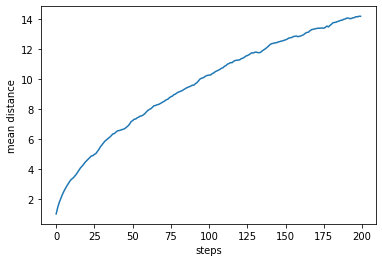

In [45]:
matrix = npr.randint(0,2,size=(1000,200))*2-1
distances = np.cumsum(matrix, axis=1)

squareDistances = np.square(distances)

meanEachStep = np.mean(squareDistances, axis=0)

distances.shape, distances1.shape
plt.plot(np.arange(200), np.sqrt(meanEachStep))
plt.xlabel('steps')
plt.ylabel('mean distance')
plt.show()

#I expected a linear dependence, but unfortunately I didn't find the points of the problem very clear.

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

In [46]:
! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt

--2020-10-31 15:33:08--  https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/3vigxoqayo389uc/populations.txt [segue]
--2020-10-31 15:33:09--  https://www.dropbox.com/s/raw/3vigxoqayo389uc/populations.txt
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc48c8147758adecaaa818217e59.dl.dropboxusercontent.com/cd/0/inline/BCWJMGyU00ST3o_vQaWbgi3Y5vrTRxMbSGCSC2p_xFoDT80McMLDS93e4KIG_QLuxXwmkapaJ6wP6lHFx0XHolPas1roh50RYgo0FFux4Wg4_g/file# [segue]
--2020-10-31 15:33:10--  https://uc48c8147758adecaaa818217e59.dl.dropboxusercontent.com/cd/0/inline/BCWJMGyU00ST3o_vQaWbgi3Y5vrTRxMbSGCSC2p_xFoDT80McMLDS93e4KIG_QLuxXwmkapaJ6wP6lHFx0XHolPas1roh50RY

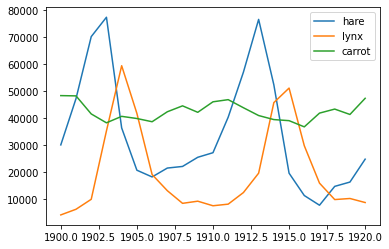


 Stats hare:
sum 715700.0
min 7600.0
argmin 17
mean 34080.95238095238
median 25400.0
std 20897.906458089667

 Stats: lynx
sum 423500.0
min 4000.0
argmin 0
mean 20166.666666666668
median 12300.0
std 16254.591536908763

 Stats: carrot
sum 890400.0
min 36700.0
argmin 16
mean 42400.0
median 41800.0
std 3322.5062255844787
If we assume carrots as 'population', they are have the highest population (by looking at the means)
correlation between carrots and hares:
 -0.016603777709879388
correlation between lynxes and hares:
 0.07189206073535573
correlation between lynxes and carrots:
 -0.6805771698401617


In [48]:
data = np.loadtxt("populations.txt")
year = data[:,0]
hare = data[:,1]
lynx = data[:,2]
carrot = data[:,3]

plt.plot(year, hare, label='hare')
plt.plot(year, lynx, label="lynx")
plt.plot(year, carrot, label="carrot")
plt.legend()
plt.show()

print("\n Stats hare:")
for function in ['sum','min','argmin','mean','median','std']:
    print (function, getattr(np, function)(hare))
print("\n Stats: lynx")
for function in ['sum','min','argmin','mean','median','std']:
    print (function, getattr(np, function)(lynx))
print("\n Stats: carrot")
for function in ['sum','min','argmin','mean','median','std']:
    print (function, getattr(np, function)(carrot))
    
##
print("If we assume carrots as 'population', they are have the highest population (by looking at the means)")

corr1=np.corrcoef(carrot,hare)
print('correlation between carrots and hares:\n', corr1[0,1])
corr2=np.corrcoef(lynx,hare)
print('correlation between lynxes and hares:\n',corr2[0,1])
corr3=np.corrcoef(lynx,carrot)
print('correlation between lynxes and carrots:\n',corr3[0,1])

#Looking at the plot we can see some correlation between the number of population of hares and its predator the, lynx